# Coursera_Capstone - A collision severity prediction model
This notebook is to share my work for a Coursera project

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction
Nowadays one of the main causes of death in the road are car accidents, these are caused due to known conditions like weather, state of the road, etc.

The purpose of this Capstone Project is to build a data science model that would help Us whether a car accident would cause property damage only or be an injury collision in the worst case scenario.

This project is designed to help the local authorities take better decisions about car accident prevention and also for the public in general that could use this information as a tool to make better choices in their daily life.

## 2. Data
### 2.1. Data Source
To build this model I used the shared data of traffic collisions from city of Seattle. Based on that data I analyzed the registered traffic collisions variables like: Weather condition, Road condition, and light conditions during the collision.

Data was extracted from: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv 

At the beginning the dataset had 194,673 rows with 37 different attributes. For the purpose of this exercise null rows and non relevant columns had to be clean up.
The data included all sorts of car collisions from 2004 to the present.


### 2.2. Data Cleaning
Here is a brief explanation of each of the variables used for the model:
* SEVERITYCODE: A code that corresponds to the severity of the collision.
* WEATHER: A description of the weather conditions during the time of the collision.
* ROADCOND: The condition of the road during the collision.
* LIGHTCOND: The light conditions during the collision.


## 3. Methodology

To solve this case I used the logistic regressión classification algorithm, let me explain why. In logistic regression, we have one or more independent variables such as Weather, Light condition and Road Condition which I grouped and transformed into numerical values. And also, to predict the outcome we have a categorical class such as Severity of the Collision, which we call the dependent variable.

So given this dataset, I tried to predict the severity of a car accident, using the explained independent variables. But first I had to analyze the composition of the raw data. Then we preprocess the data frame and select only the key features. In this process I had to clean the unuseful rows or not statistical significant data, like “Unknows” and “Others”. Then I had to make sure to use only numerical data for the independent variables. Drop the null rows, and finally We are ready to execute the logistic regression algorithm to evaluate the results.

### Import libraries

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### Download the dataset

In [3]:
!wget -O Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-01 15:36:48--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Collisions.csv’

Collisions.csv      100%[===================>]  70.49M  22.5MB/s    in 3.2s    

2020-10-01 15:36:52 (21.9 MB/s) - ‘Collisions.csv’ saved [73917638/73917638]



### Load Data From CSV File  

In [4]:
df = pd.read_csv('Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
df.shape

(194673, 38)

## Preprocessing
Lets select some features for the modeling. Also we should change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:

In [9]:
churn_df = df[['SEVERITYCODE', 'WEATHER','ROADCOND','LIGHTCOND']]
churn_df['SEVERITYCODE'].replace(to_replace=[2], value=[0],inplace=True)
churn_df['SEVERITYCODE'] = churn_df['SEVERITYCODE'].astype('int')
churn_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,0,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,0,Raining,Wet,Daylight


In [51]:
churn_df['SEVERITYCODE'].value_counts()

1    113985
0     55554
Name: SEVERITYCODE, dtype: int64

__Here we analice and clean the labels for each column.__
</br>Lets begin with Weather column and repeat with the others

In [10]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Then We clean the rows that represent less than __1%__ of the total, or are not valuable information like: unkows, others.

In [11]:
# Get names of indexes for which column Age has value 30
indexNames = churn_df[ churn_df['WEATHER'] == 'Unknown'].index
# Delete these row indexes from dataFrame
churn_df.drop(indexNames, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
indexNames = churn_df[ churn_df['WEATHER'] == 'Other'].index
churn_df.drop(indexNames, inplace=True)

In [13]:
indexNames = churn_df[ churn_df['WEATHER'] == 'Sleet/Hail/Freezing Rain'].index
churn_df.drop(indexNames, inplace=True)

In [14]:
indexNames = churn_df[ churn_df['WEATHER'] == 'Blowing Sand/Dirt'].index
churn_df.drop(indexNames, inplace=True)

In [15]:
indexNames = churn_df[ churn_df['WEATHER'] == 'Severe Crosswind'].index
churn_df.drop(indexNames, inplace=True)

In [16]:
indexNames = churn_df[ churn_df['WEATHER'] == 'Partly Cloudy'].index
churn_df.drop(indexNames, inplace=True)

Here we check the results

In [17]:
churn_df['WEATHER'].value_counts()

Clear             111135
Raining            33145
Overcast           27714
Snowing              907
Fog/Smog/Smoke       569
Name: WEATHER, dtype: int64

In [18]:
churn_df.shape

(178551, 4)

Now we replace the remaining rows with an numerical value

In [19]:
churn_df['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Snowing','Fog/Smog/Smoke'], value=[0,1,2,3,4],inplace=True)
#df.head()

#Drop removes a specified row or column from a dataframe
#ratings_df = ratings_df.drop('timestamp', 1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


__Again for the other columns__

In [20]:
churn_df['LIGHTCOND'].value_counts()

Daylight                    113191
Dark - Street Lights On      46954
Dusk                          5693
Unknown                       2437
Dawn                          2423
Dark - No Street Lights       1420
Dark - Street Lights Off      1120
Other                          186
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

In [21]:
indexNames = churn_df[ churn_df['LIGHTCOND'] == 'Other'].index
churn_df.drop(indexNames, inplace=True)

In [22]:
indexNames = churn_df[ churn_df['LIGHTCOND'] == 'Dark - Unknown Lighting'].index
churn_df.drop(indexNames, inplace=True)

In [23]:
indexNames = churn_df[ churn_df['LIGHTCOND'] == 'Unknown'].index
churn_df.drop(indexNames, inplace=True)

In [24]:
churn_df['LIGHTCOND'].replace(to_replace=['Dark - Street Lights Off'], value=['Dark - No Street Lights'],inplace=True)

In [25]:
churn_df['LIGHTCOND'].value_counts()

Daylight                   113191
Dark - Street Lights On     46954
Dusk                         5693
Dark - No Street Lights      2540
Dawn                         2423
Name: LIGHTCOND, dtype: int64

In [26]:
churn_df['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Dusk','Dark - No Street Lights','Dawn'], value=[0,1,2,3,4],inplace=True)

In [27]:
churn_df['ROADCOND'].value_counts()

Dry               121639
Wet                46297
Ice                 1059
Snow/Slush           807
Unknown              796
Standing Water       102
Other                 99
Sand/Mud/Dirt         66
Oil                   60
Name: ROADCOND, dtype: int64

In [28]:
indexNames = churn_df[ churn_df['ROADCOND'] == 'Unknown'].index
churn_df.drop(indexNames, inplace=True)

In [29]:
indexNames = churn_df[ churn_df['ROADCOND'] == 'Standing Water'].index
churn_df.drop(indexNames, inplace=True)

In [30]:
indexNames = churn_df[ churn_df['ROADCOND'] == 'Other'].index
churn_df.drop(indexNames, inplace=True)

In [31]:
indexNames = churn_df[ churn_df['ROADCOND'] == 'Sand/Mud/Dirt'].index
churn_df.drop(indexNames, inplace=True)

In [32]:
indexNames = churn_df[ churn_df['ROADCOND'] == 'Oil'].index
churn_df.drop(indexNames, inplace=True)

In [33]:
churn_df['ROADCOND'].value_counts()

Dry           121639
Wet            46297
Ice             1059
Snow/Slush       807
Name: ROADCOND, dtype: int64

In [34]:
churn_df['ROADCOND'].replace(to_replace=['Dry','Wet','Ice','Snow/Slush'], value=[0,1,2,3],inplace=True)

__Here We check the state of the table__

In [35]:
churn_df.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,0,2.0,1.0,0.0
1,1,1.0,1.0,1.0
2,1,2.0,0.0,0.0
3,1,0.0,0.0,0.0
4,0,1.0,1.0,0.0


In [36]:
churn_df.shape

(174796, 4)

__Now lets drop the rows with null values__

In [37]:
churn_df = churn_df[pd.notnull(churn_df["WEATHER"])]
churn_df = churn_df.reset_index(drop=True)
churn_df.shape

(169730, 4)

In [38]:
churn_df = churn_df[pd.notnull(churn_df["ROADCOND"])]
churn_df = churn_df.reset_index(drop=True)
churn_df.shape

(169698, 4)

In [39]:
churn_df = churn_df[pd.notnull(churn_df["LIGHTCOND"])]
churn_df = churn_df.reset_index(drop=True)
churn_df.shape

(169539, 4)

__Here we define our dependent variable (Y)__

In [40]:
y = np.asarray(churn_df['SEVERITYCODE'])
y [0:5]

array([0, 1, 1, 1, 0])

__Here we define our independent variables (X)__

In [41]:
X = np.asarray(churn_df[['WEATHER','ROADCOND','LIGHTCOND']])
X[0:5]

array([[2., 1., 0.],
       [1., 1., 1.],
       [2., 0., 0.],
       [0., 0., 0.],
       [1., 1., 0.]])

Also, we normalize the dataset:

In [42]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.83795139,  1.39934935, -0.58496005],
       [ 0.58205411,  1.39934935,  0.73795357],
       [ 1.83795139, -0.59807679, -0.58496005],
       [-0.67384316, -0.59807679, -0.58496005],
       [ 0.58205411,  1.39934935, -0.58496005]])

Now we split our dataset into train and test set:

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (135631, 3) (135631,)
Test set: (33908, 3) (33908,)


Now lets fit our model with train set:

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Then we can predict using our test set:

In [45]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

## Results

In this section we can see the results of the proposed model. As you will see predict_proba function  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X) Property Damage only, and second column is probability of class 0, P(Y=0|X) Injury Collision:

In [46]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.31927829, 0.68072171],
       [0.33361334, 0.66638666],
       [0.33539858, 0.66460142],
       ...,
       [0.32057935, 0.67942065],
       [0.33539858, 0.66460142],
       [0.33539858, 0.66460142]])

With jaccard's index for __accuracy evaluation__ we can see there is an accuracy prediction of __67.27%__

In [47]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6727026070543825

### Confusion matrix
Another way of looking at accuracy of the classifier is to look at __confusion matrix__.

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[22810     0]
 [11098     0]]


Confusion matrix, without normalization
[[22810     0]
 [11098     0]]


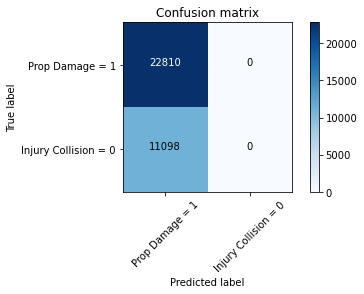

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Prop Damage = 1','Injury Collision = 0'],normalize= False,  title='Confusion matrix')

## Discussion

As you can see in the previous graphic, 22,810 collisions out of a test sample of 33,908 are correctly predicted as “1” Property Damage only. That means that means that 68.92% of the time a person that drives through the roads of Seattle with bad weather, poor road conditions and or absence of good light conditions could have a car accident with property damage. On the other hand 11,098 samples of collision were misclassified as damage property only when they should have been an injury collision type. This means that 32.72% of the time a collision might result in injury consequences for the people involved.

## Conclussion

The purpose of this project was to build a data science model that would help us predict the possibility of getting into a car collision and the severity of it. This would help local authorities to take better decisions about car accident prevention and also for the public in general that could use this information as a tool to make better choices in their daily life. We did this first by understanding that a logistic regression model would be the best classification algorithm due to the variables found in the dataset. Then I had to identify the key independent variables: Weather conditions; Light conditions; Road conditions.

After cleaning and processing the data into the algorithm we can see that from one out of three collisions in the city of Seattle could end up in a serious injury for the persons involved. Whatsmore, using Jaccard's evaluation index we can also identify an accuracy of 67.27% for the prediction model. Finally, we can conclude that if we could have data of the cars not involved in a collision every time they go out to the road, we could take the prediction model to a new level. We could even try to predict if they would or would not get into a car accident. The possibility of having that kind of data would be wonderful, and thus with reason we can say that having good data is the new gold.